<a href="https://colab.research.google.com/github/elliecheshire/Stop_and_Search/blob/main/Stop_Search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount drive to allow access to files
from google.colab import drive; drive.mount('/content/drive')
import pandas as pd

# read in .xlsx files into data frames
# these .xlsx files contain all stop and search data from police forces across Endland and Wales
# data is split into 2 files based on years

data07_20 = pd.read_excel('/content/drive/MyDrive/programming_freeform_assessment/stop_search_07_20.xlsx')

data21_23 = pd.read_excel('/content/drive/MyDrive/programming_freeform_assessment/stop_search_21_23.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,financial_year,financial_year_quarter,geocode,police_force_area,region,legislation,reason_for_search,outcome,link,self_defined_ethnicity,self_defined_ethnicity_group,officer_defined_ethnicity,combined_ethnicity,sex,age_group,number_of_searches
0,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Pakistani or British Pakistani,Asian or Asian British,NaN,Asian or Asian British,Male,25-29,1
1,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Black or Black British African,Black or Black British,NaN,Black or Black British,Male,30 or over,1
2,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Not Stated,Not Stated,Other,Mixed or Other,Male,18-24,1
3,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Not linked,Not Stated,Not Stated,White,White,Male,30 or over,1
4,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Not Stated,Not Stated,White,White,Male,30 or over,1


In [22]:
data07_20.head()
data21_23.head()

,financial_year,financial_year_quarter,geocode,police_force_area,region,legislation,reason_for_search,outcome,link,self_defined_ethnicity,Ethnic Group (self-defined - new style),officer_defined_ethnicity,combined_ethnicity,sex,age_group,number_of_searches
0,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Pakistani or British Pakistani,Asian or Asian British,NaN,Asian or Asian British,Male,25-29,1
1,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Black or Black British African,Black or Black British,NaN,Black or Black British,Male,30 or over,1
2,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Not Stated,Not Stated,Other,Mixed or Other,Male,18-24,1
3,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Not linked,Not Stated,Not Stated,White,White,Male,30 or over,1
4,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Not Stated,Not Stated,White,White,Male,30 or over,1


In [31]:
# as these 2 datasets are from different years the formatting is inconsistent
# the data therefore needs cleaning so it can be used together

# although both datasets contain mostly the same columns these are named differently so cannot be merged

# change name of Financial Year column
data07_20.rename(columns={'Financial Year': 'financial_year'}, inplace=True)
# change name of police force area column
data07_20.rename(columns = {'Force Name': 'police_force_area'}, inplace=True)
# make all police force names consistent across each dataset (change 'and' to '&')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('and', '&')
# change back place names containing 'and' (e.g. Midlands and Cleaveland)
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('West Midl&s', 'West Midlands')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('Clevel&', 'Cleveland')

# change name of region column
data07_20.rename(columns = {'Region': 'region'}, inplace=True)

# change name of legislation column by removing uppercase
data07_20.rename(columns = {'Legislation': 'legislation'}, inplace=True)

# change name of Reason for Search / Arrest column
data07_20.rename(columns = {'Reason for search / arrest': 'reason_for_search'}, inplace=True)

# change name of Geocode column
data07_20.rename(columns = {'Geocode': 'geocode'}, inplace=True)

# the method for defining ethnic group in the police changed over this period
# the new style used in the 07-20 dataset can be matched to the self_defined_ethnic group column of the 21_23 dataset
# this column will be used for ethnicity in the merged dataset
# change the name of Self_defined_ethnic group to Ethnic group (self-defined - new style)
data21_23.rename(columns = {'self_defined_ethnicity_group': 'Ethnic Group (self-defined - new style)'}, inplace=True)

# change name of Searches column to number of searches
data07_20.rename(columns = {'Searches': 'number_of_searches'}, inplace=True)

In [32]:
# merge data sets into on dataframe
shared_columns = list(set(data07_20.columns) & set(data21_23.columns))

data07_20_subset = data07_20[shared_columns]
data21_23_subset = data21_23[shared_columns]


combined_data = pd.concat([data07_20_subset, data21_23_subset])

# change name of Ethnic group column to allign with other column layouts
combined_data.rename(columns = {'Ethnic Group (self-defined - new style)': 'ethnic_group'}, inplace=True)

combined_data.head()

,ethnic_group,region,geocode,financial_year,legislation,reason_for_search,number_of_searches,police_force_area
0,Asian or Asian British,South West,E23000036,2006/07,Section 1 (PACE),Criminal Damage,0,Avon & Somerset
1,Asian or Asian British,South West,E23000036,2006/07,Section 1 (PACE),Criminal Damage,0,Avon & Somerset
2,Asian or Asian British,South West,E23000036,2006/07,Section 1 (PACE),Criminal Damage,0,Avon & Somerset
3,Asian or Asian British,South West,E23000036,2006/07,Section 1 (PACE),Criminal Damage,0,Avon & Somerset
4,Black or Black British,South West,E23000036,2006/07,Section 1 (PACE),Criminal Damage,0,Avon & Somerset


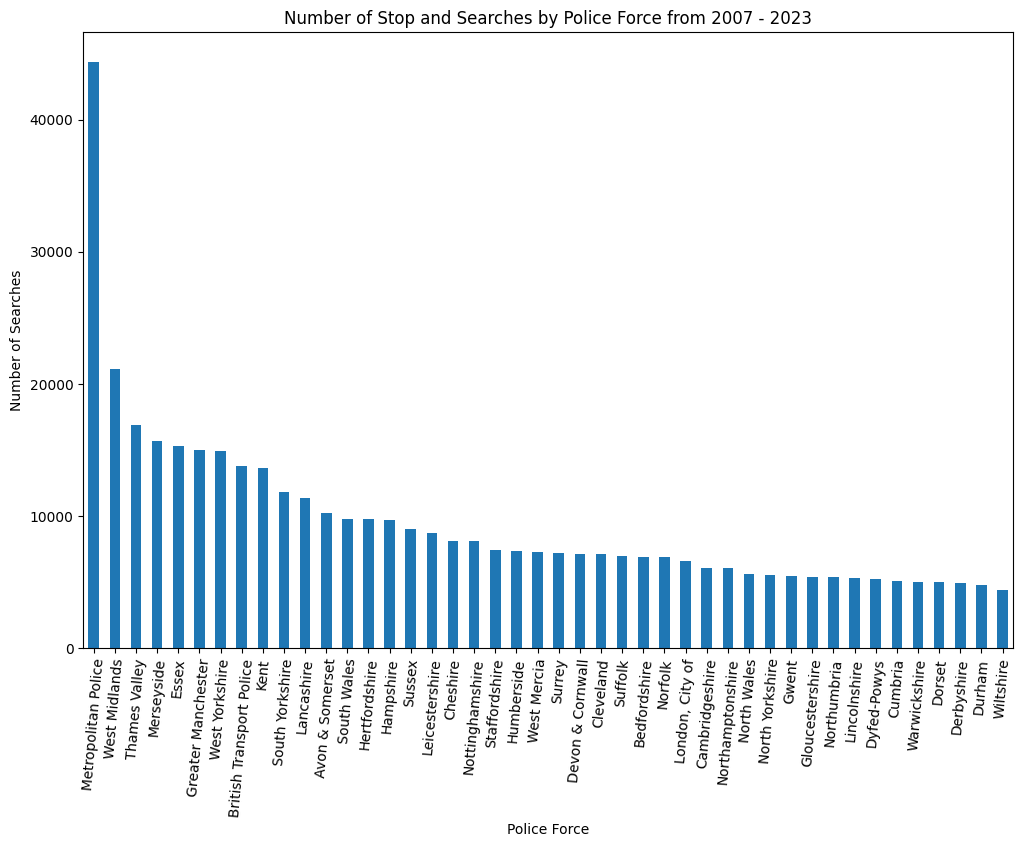

In [40]:
# Number of searches by each force over the 2007 - 2023 period
import matplotlib.pyplot as plt

# plot a bar chart of police force by number of searches
force_name_counts = combined_data['police_force_area'].value_counts()
force_name_counts.plot(kind = 'bar', width=0.5, figsize = (12,8))
plt.title('Number of Stop and Searches by Police Force from 2007 - 2023')
plt.xlabel('Police Force')
plt.xticks(rotation = 85)
plt.ylabel('Number of Searches')
plt.show()